In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('data_csv/air-france_reviews.csv')
df

title      departure  \
0                         Never travel  with Air France      Vancouver   
1                                      Terrible service        Chicago   
2                                             Traumatic         London   
3     Air France,  the airline that keeps loosing lu...         London   
4                          ^^^^ Take Me  Home AF   ^^^^      Vancouver   
...                                                 ...            ...   
4975                    Excellent service at Air France  San Francisco   
4976                 Good flight with on board services        Atlanta   
4977                         Air France keeps it classy          Paris   
4978                Lost Luggage for a week on vacation  New York City   
4979  Terrible flight experience with Air France bet...       Tel Aviv   

     destination  type_of_route  \
0      New Delhi  International   
1          Paris  International   
2        Algiers  International   
3          Paris         Europe   
4     Manchester  International   
...          ...            ...   
4975   Barcelona  International   
4976    Florence  International   
4977      Bamako  International   
4978    Helsinki  International   
4979       Paris  International   

                                            review_text    travel_date  \
0     Worst Airline.stopped for door repair about 4 ...  December 2024   
1     I boarded Air France on the 19th of December 2...  December 2024   
2     A truly traumatic experience! So much that I g...    August 2024   
3     Air France is quickly becoming the airline for...  December 2024   
4     We had  surprisingly smooth  flight  with Air ...  December 2024   
...                                                 ...            ...   
4975  Flew from San Francisco to Barcelona with a la...   October 2018   
4976  Flight from ATL to CDG was with good plane. Wi...  November 2018   
4977  I travel on Air France quite often and have fo...  November 2018   
4978  In transit my luggage was lost and it took a w...      July 2018   
4979  Flying Business from Tel Aviv to Paris with Ai...   October 2018   

            review_date  rating  legroom_rating  seat_comfort_rating  \
0     December 21, 2024     1.0             1.0                  2.0   
1     December 20, 2024     1.0             NaN                  NaN   
2     December 19, 2024     2.0             1.0                  1.0   
3     December 19, 2024     3.0             3.0                  3.0   
4     December 19, 2024     4.0             4.0                  NaN   
...                 ...     ...             ...                  ...   
4975  December 18, 2018     5.0             NaN                  NaN   
4976  December 18, 2018     4.0             2.0                  3.0   
4977  December 18, 2018     4.0             5.0                  4.0   
4978  December 18, 2018     2.0             3.0                  3.0   
4979  December 18, 2018     1.0             1.0                  1.0   

      entertainment_rating  customer_service_rating  value_rating  \
0                      1.0                      1.0           1.0   
1                      NaN                      NaN           NaN   
2                      1.0                      2.0           1.0   
3                      3.0                      4.0           3.0   
4                      4.0                      4.0           4.0   
...                    ...                      ...           ...   
4975                   NaN                      NaN           NaN   
4976                   4.0                      5.0           4.0   
4977                   5.0                      5.0           5.0   
4978                   3.0                      3.0           NaN   
4979                   1.0                      1.0           1.0   

      cleanliness_rating  check_in_rating  food_rating  
0                    2.0              1.0          1.0  
1                    NaN              NaN  

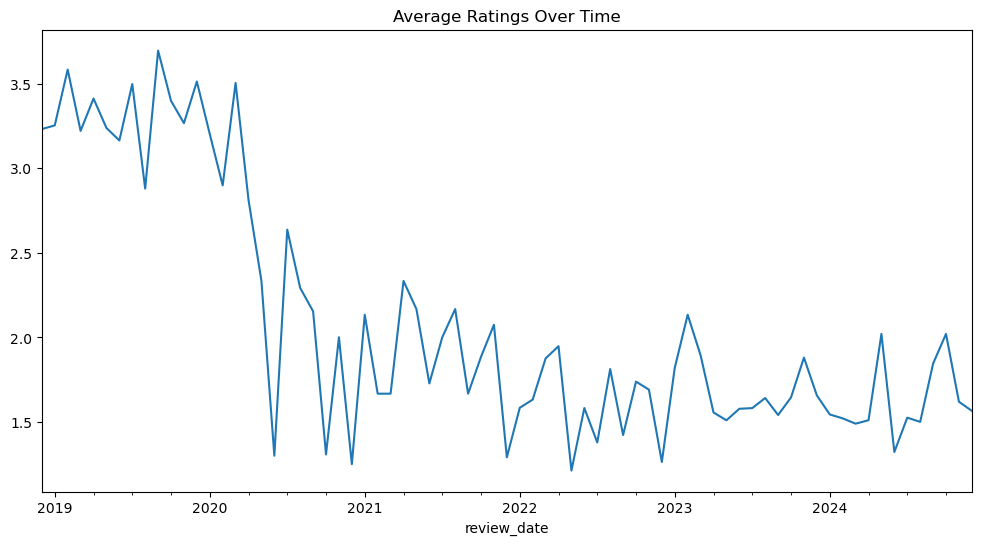


Average Ratings by Route Type:
 type_of_route
Africa           1.000000
Canada           5.000000
Caribbean        1.875000
Domestic         2.682692
Europe           2.621328
International    2.703280
North Africa     1.000000
Russia           1.500000
USA              1.000000
Name: rating, dtype: float64

Top 10 Routes:
 departure      destination  
New York City  Paris            93
Paris          New York City    87
Los Angeles    Paris            85
Atlanta        Paris            70
Washington DC  Paris            66
Paris          Los Angeles      63
Boston         Paris            53
Toronto        Paris            50
Paris          Atlanta          49
San Francisco  Paris            46
dtype: int64


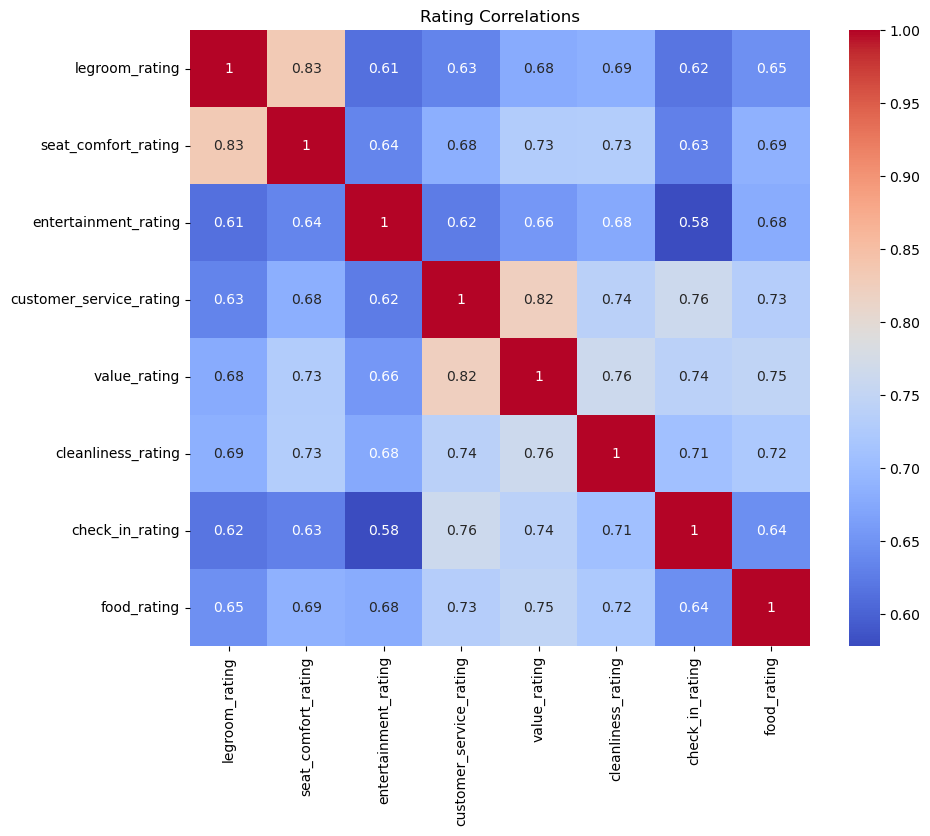

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average ratings
rating_cols = ['legroom_rating', 'seat_comfort_rating', 'entertainment_rating',
              'customer_service_rating', 'value_rating', 'cleanliness_rating',
              'check_in_rating', 'food_rating']

# 2. Rating trends over time
df['review_date'] = pd.to_datetime(df['review_date'])
monthly_ratings = df.groupby(df['review_date'].dt.to_period('M'))['rating'].mean()
plt.figure(figsize=(12,6))
monthly_ratings.plot()
plt.title('Average Ratings Over Time')
plt.show()

# 3. Ratings by route type
route_ratings = df.groupby('type_of_route')['rating'].mean()
print("\nAverage Ratings by Route Type:\n", route_ratings)

# 5. Common routes
routes = df.groupby(['departure', 'destination']).size().sort_values(ascending=False).head(10)
print("\nTop 10 Routes:\n", routes)

# 6. Rating correlations
correlation_matrix = df[rating_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Rating Correlations')
plt.show()

In [8]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

In [9]:
docs = df['review_text'].astype(str).tolist()

# Initialize models
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
topic_model = BERTopic(embedding_model=sentence_model)

# Fit model and get topics
topics, probs = topic_model.fit_transform(docs)

# Get topic info
topic_info = topic_model.get_topic_info()
print("\nTop Topics:\n", topic_info.head(10))

# Get representative docs per topic
for topic in topic_model.get_topics():
   print(f"\nTopic {topic}:")
   print(topic_model.get_representative_docs(topic)[:2])

# Visualize topics
topic_model.visualize_topics()

# Optional: Topic evolution over time
timestamps = df['review_date'].tolist()
topics_over_time = topic_model.topics_over_time(docs, timestamps)
topic_model.visualize_topics_over_time(topics_over_time)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Top Topics:
    Topic  Count                       Name  \
0     -1   2002          -1_the_to_and_was   
1      0    668        0_luggage_my_to_and   
2      1    583     1_good_very_was_flight   
3      2    532       2_and_france_air_was   
4      3    122            3_to_the_we_and   
5      4    100  4_worst_airline_ever_they   
6      5     82            5_the_was_we_to   
7      6     71       6_refund_to_they_the   
8      7     71       7_seat_seats_the_was   
9      8     60    8_refund_they_my_ticket   

                                      Representation  \
0   [the, to, and, was, in, flight, of, we, for, on]   
1  [luggage, my, to, and, they, the, it, in, bag,...   
2  [good, very, was, flight, food, and, the, serv...   
3  [and, france, air, was, the, flight, paris, go...   
4  [to, the, we, and, flight, was, at, us, in, that]   
5  [worst, airline, ever, they, company, service,...   
6  [the, was, we, to, and, of, flight, on, that, ...   
7  [refund, to, they, the, fran

2024-12-26 17:43:01,259 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 1524) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 


In [3]:

from torch.nn.functional import softmax
from sentence_transformers import SentenceTransformer
import torch

# Load model and tokenizer
model_name = 'Alibaba-NLP/gte-base-en-v1.5'
model = SentenceTransformer(model_name, trust_remote_code=True)

# create a function to compute the similarity between a given text and a list of topics and return the most similar topic
def get_topic(text, topics, model_name, top_k_topic=1, verbose=False):
   # Load model

   # Encode topics and text
   topic_embeddings = model.encode(topics)
   text_embedding = model.encode([text])[0]
   
   # Calculate similarities
   similarities = torch.nn.functional.cosine_similarity(
      torch.tensor(text_embedding).unsqueeze(0),
      torch.tensor(topic_embeddings),
      dim=1
   )
   
   # Get top k topic where we return the ks most similar topics
   top_topics = torch.topk(similarities, top_k_topic)
   
   if verbose:
      print(f"Text: {text}")
      for i, index in enumerate(top_topics.indices):
         print(f"Topic {i+1}: {topics[index]} ({top_topics.values[i]:.2f})")
   
   return [topics[i] for i in top_topics.indices[:top_k_topic]]

In [6]:
# Test the function
text = df.review_text[0]
text = "The flight was delayed by 2 hours and the service was terrible. My son was also lost."
topic = get_topic(text, topics, model_name, top_k_topic=3, verbose=True)
print("\nPredicted Topic:", topic)

Text: The flight was delayed by 2 hours and the service was terrible. My son was also lost.
Topic 1: comfort (0.40)
Topic 2: customer_service (0.39)
Topic 3: luggage (0.36)

Predicted Topic: ['comfort', 'customer_service', 'luggage']


In [22]:
from tqdm import tqdm
tqdm.pandas()

# topics = [
#    'customer_service',
#    'comfort',
#    'punctuality', 
#    'price_value',
#    'food_beverage',
#    'luggage',
#    'entertainment',
#    'loyalty_program'
# ]

topics = [
    "safety security screening protocols passenger security measures aircraft safety",
    "crew service staff flight attendants cabin crew assistance passenger support professionalism",
    "seat comfort legroom space recline seating width cushioning ergonomics",
    "food beverage meals drinks snacks catering dining refreshments",
    "cleanliness hygiene cabin cleanliness bathroom toilet tidiness interior maintenance",
    "punctuality reliability delays schedule timing departure arrival on-time performance",
    "value money price cost fare fees charges pricing affordability worth",
    "entertainment amenities wifi connectivity power outlets movies shows music facilities",
    "luggage baggage handling suitcase bags check-in lost damaged delayed baggage claim"
]

airline_topics_mapping = {
    "safety security screening protocols passenger security measures aircraft safety": "Safety & Security",
    "crew service staff flight attendants cabin crew assistance passenger support professionalism": "Crew Service", 
    "seat comfort legroom space recline seating width cushioning ergonomics": "Seat Comfort",
    "food beverage meals drinks snacks catering dining refreshments": "Food & Beverage",
    "cleanliness hygiene cabin cleanliness bathroom toilet tidiness interior maintenance": "Cabin Cleanliness",
    "punctuality reliability delays schedule timing departure arrival on-time performance": "Punctuality",
    "value money price cost fare fees charges pricing affordability worth": "Value for Money",
    "entertainment amenities wifi connectivity power outlets movies shows music facilities": "Entertainment & Amenities",
    "luggage baggage handling suitcase bags check-in lost damaged delayed baggage claim": "Baggage Handling"
}

# apply the function to all reviews with progress bar
result = df['review_text'][:50].progress_apply(lambda x: get_topic(x, topics, model_name, top_k_topic=3, verbose=False))

for i, data in enumerate(zip(result, df['review_text'][:50])):
   print(f"\nReview {i+1}:\n")
   print(f"Text: {data[1]}")
   print("Predicted Topics titles:", [airline_topics_mapping[topic] for topic in data[0]])

100%|██████████| 50/50 [00:02<00:00, 17.57it/s]


Review 1:

Text: Worst Airline.stopped for door repair about 4 hours.seats were broken.bad behavior  of staff.meal quality  very bad.i made  two trips  in this year .both times very bad experience. Please  never travel  with this flight..
Predicted Topics titles: ['Baggage Handling', 'Crew Service', 'Punctuality']

Review 2:

Text: I boarded Air France on the 19th of December 2024 at ORD . The flight was delayed from 5:17 until departure was 7pm. I explained to them I had a connecting flight at Rome to KSA . They said don’t worry , but once i arrived in France I was rebooked for a flight 5 hours later causing me to lose money and miss my connection. 
Customer service was very rude and gave me an 11$ voucher to eat with 🤦🏽‍♂️.
I will never travel with this airline again
Predicted Topics titles: ['Baggage Handling', 'Punctuality', 'Crew Service']

Review 3:

Text: A truly traumatic experience! So much that I get emotionally triggered every time AirFrance is mentioned. Cancelled a flight

In [15]:
pd.DataFrame(result.tolist(), columns=['topic1', 'topic2', 'topic3'])

topic1            topic2            topic3
0              luggage           comfort  customer_service
1     customer_service           luggage       punctuality
2              luggage           comfort  customer_service
3              luggage  customer_service           comfort
4              comfort           luggage     entertainment
...                ...               ...               ...
4975           comfort           luggage  customer_service
4976           comfort           luggage     entertainment
4977           comfort  customer_service           luggage
4978           luggage  customer_service           comfort
4979           luggage           comfort  customer_service

[4980 rows x 3 columns]

In [51]:
df[['review_text', 'predicted_topic']].head()

review_text predicted_topic
0  Worst Airline.stopped for door repair about 4 ...       [seating]
1  I boarded Air France on the 19th of December 2...         [delay]
2  A truly traumatic experience! So much that I g...       [seating]
3  Air France is quickly becoming the airline for...       [service]
4  We had  surprisingly smooth  flight  with Air ...       [seating]

In [ ]:
# perform the clustering of the reviews based on their embeddings using HDBSCAN
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA

# Encode reviews
embeddings = model.encode(df['review_text'].tolist())

# Reduce dimensionality
pca = PCA(n_components=50)

# Fit and transform
embeddings_pca = pca.fit_transform(embeddings)

# Cluster embeddings
cluster = HDBSCAN(min_cluster_size=15, min_samples=5, cluster_selection_epsilon=0.5)
df['cluster'] = cluster.fit_predict(embeddings_pca)

NameError: name 'plt' is not defined

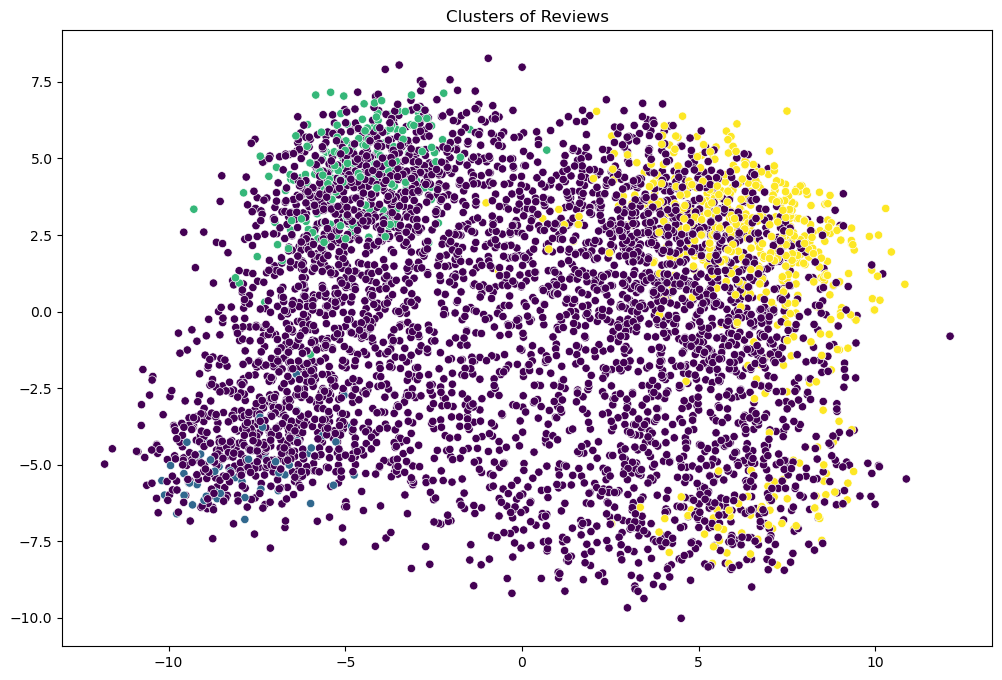

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x=embeddings_pca[:,0], y=embeddings_pca[:,1], hue=df['cluster'], palette='viridis', legend=False)
plt.title('Clusters of Reviews')
plt.show()

In [18]:
# create cluster with top2vec
from top2vec import Top2Vec
from umap import UMAP

# Initialize model
model = Top2Vec(documents=df['review_text'].tolist())

2024-12-28 19:13:50,424 - top2vec - INFO - Pre-processing documents for training


c:\Users\doria\anaconda3\envs\ml\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-12-28 19:13:52,327 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2024-12-28 19:13:53,732 - top2vec - INFO - Creating joint document/word embedding
2024-12-28 19:14:32,623 - top2vec - INFO - Creating lower dimension embedding of documents
2024-12-28 19:14:35,040 - top2vec - INFO - Finding dense areas of documents
2024-12-28 19:14:35,265 - top2vec - INFO - Finding topics


c:\Users\doria\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


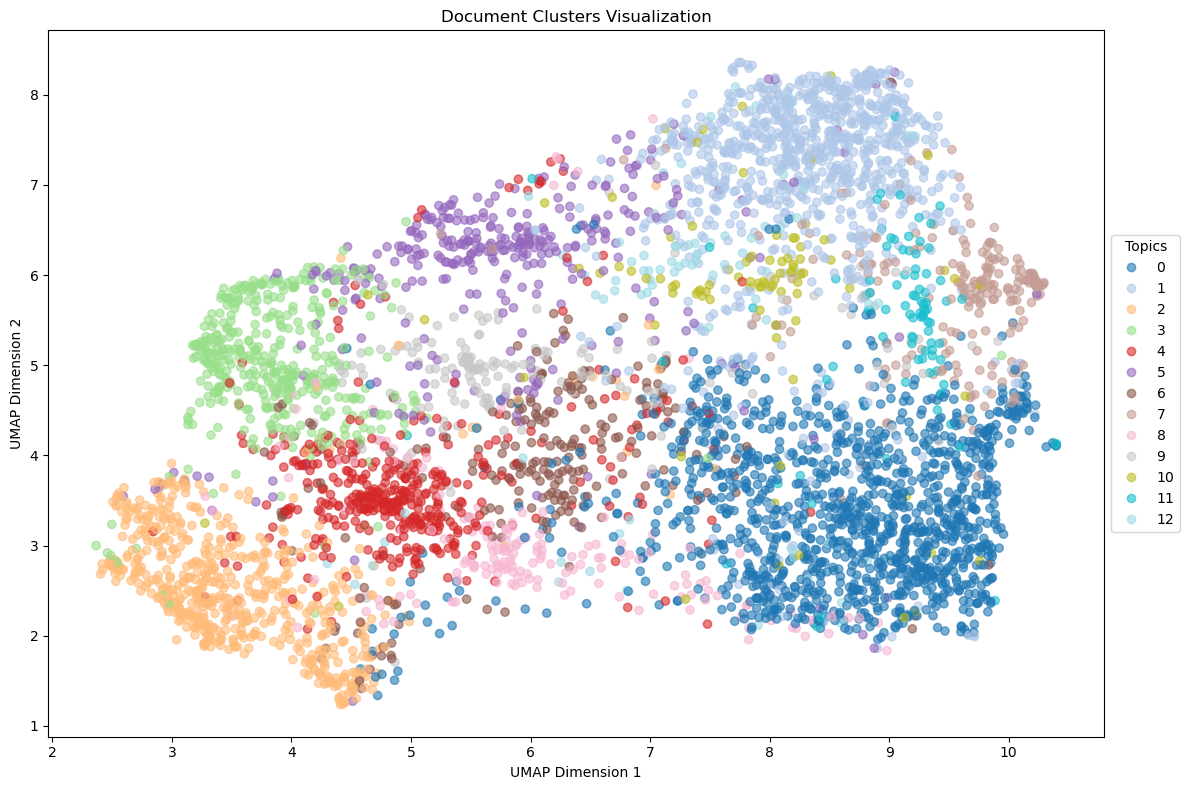

In [22]:
import umap

# Get document embeddings
doc_embeddings = model.document_vectors

# Reduce dimensionality using UMAP for visualization
umap_reducer = umap.UMAP(n_neighbors=15, 
                        n_components=2, 
                        metric='cosine', 
                        random_state=42)
umap_embeddings = umap_reducer.fit_transform(doc_embeddings)

# Get topic assignments for each document
doc_topics = model.get_documents_topics(list(range(len(df['review_text'].tolist()))))[0]

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_embeddings[:, 0], 
                     umap_embeddings[:, 1], 
                     c=doc_topics, 
                     cmap='tab20', 
                     alpha=0.6)

# Add legend
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Topics",
                    loc="center left",
                    bbox_to_anchor=(1, 0.5))

# Add labels and title
plt.title('Document Clusters Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

In [33]:
import plotly.express as px

# select 12 distinct colors from seaborn color palette
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000', '#808080', '#800000']



# Create scatter plot
fig = px.scatter(
    x=umap_embeddings[:, 0],
    y=umap_embeddings[:, 1],
    color=doc_topics,
    color_discrete_sequence=colors,
    hover_data=[df.review_text.tolist()]  # Show document text on hover
)

# 5. Using built-in colorway
fig.update_layout(colorway=px.colors.qualitative.Dark24)